# DataArray - Dfs123 plotting

A DataArray with gridded data, can be plotted in many different ways.

In [1]:
import matplotlib.pyplot as plt
import mikeio
%load_ext autoreload
%autoreload 2

## Dfs1

In [2]:
ds = mikeio.read("../tests/testdata/vu_tide_hourly.dfs1")
da = ds[0]
da

<mikeio.DataArray>
Name: Tidal current component (geographic North)
Dimensions: (721, 11)
Time: 2021-08-01 00:00:00 - 2021-08-31 00:00:00

In [3]:
da.geometry

<mikeio.Grid1D>
axis: nx=11 points from x0=0 to x1=0.981768 with dx=0.0981768

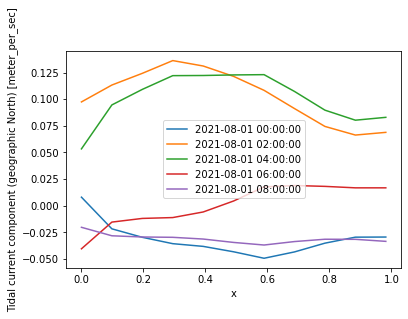

In [4]:
steps = slice(0,10,2)
ax=da[steps].plot()
ax.legend(da[steps].time);

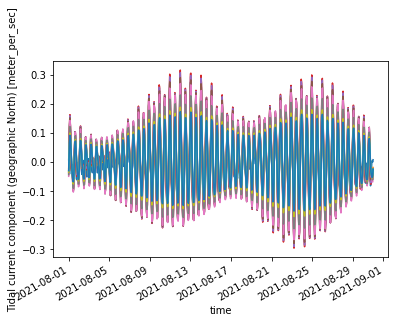

In [5]:
# plot all points on line as time series
da.plot.timeseries();

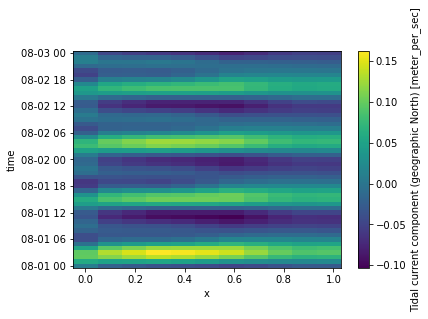

In [6]:
# first 48 hours...  
da[:49].plot.pcolormesh();

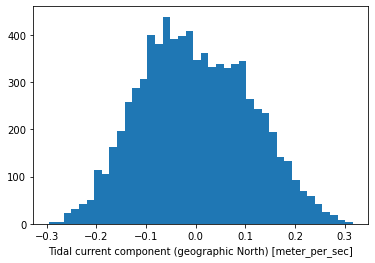

In [7]:
da.plot.hist(bins=40);

## Dfs2

In [8]:
da = mikeio.read("../tests/testdata/gebco_sound.dfs2")[0]
da

<mikeio.DataArray>
Name: Elevation
Dimensions: (1, 264, 216)
Time: 2020-05-15 11:04:52 - 2020-05-15 11:04:52

In [9]:
da.geometry

<mikeio.Grid2D>
x-axis: nx=216 points from x0=0 to x1=0.895833 with dx=0.00416667
y-axis: ny=264 points from y0=0 to y1=1.09583 with dy=0.00416667
Number of grid points: 57024

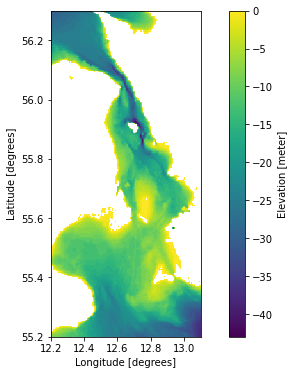

In [10]:
da.plot(figsize=(10,6));

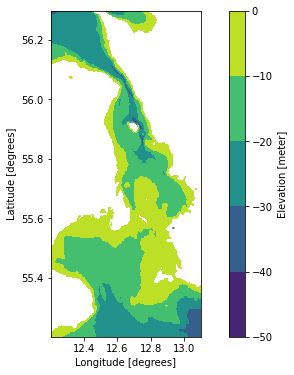

In [11]:
da.plot.contourf(figsize=(10,6), levels=4);

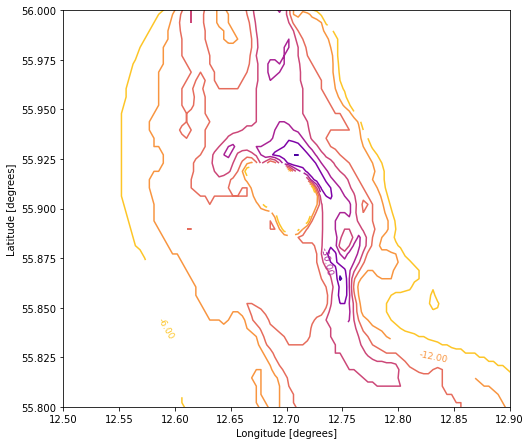

In [12]:
ax = da.plot.contour(figsize=(8,8), cmap="plasma")
ax.set_xlim([12.5, 12.9]);
ax.set_ylim([55.8, 56]);

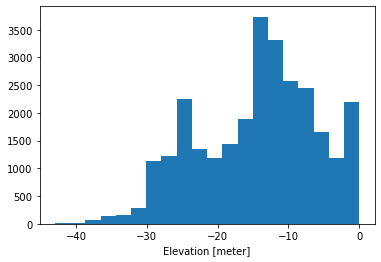

In [13]:
da.plot.hist(bins=20);